In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import r2_score

In [4]:
df = pd.read_csv("gld_price_data.csv")

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [5]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,01/02/08,1447.160034,84.860001,78.470001,15.180,1.471692
1,01/03/08,1447.160034,85.570000,78.370003,15.285,1.474491
2,01/04/08,1411.630005,85.129997,77.309998,15.167,1.475492
3,01/07/08,1416.180054,84.769997,75.500000,15.053,1.468299
4,01/08/08,1390.189941,86.779999,76.059998,15.590,1.557099


In [6]:
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [27]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [28]:
correlation=df.corr()

<AxesSubplot:>

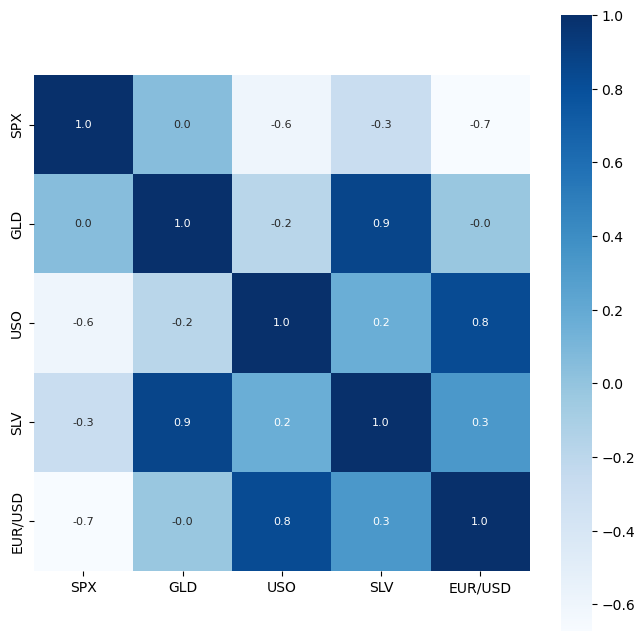

In [37]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True,square=True, fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

              SPX       GLD       USO       SLV   EUR/USD
SPX      1.000000  0.049345 -0.591573 -0.274055 -0.672017
GLD      0.049345  1.000000 -0.186360  0.866632 -0.024375
USO     -0.591573 -0.186360  1.000000  0.167547  0.829317
SLV     -0.274055  0.866632  0.167547  1.000000  0.321631
EUR/USD -0.672017 -0.024375  0.829317  0.321631  1.000000


In [7]:
x = df[['SPX','USO','SLV','EUR/USD']]
y = df['GLD']

In [8]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [9]:
scaler = MinMaxScaler()

In [10]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [11]:
model = Sequential()

In [12]:
model.add(Dense(10,activation='relu',input_dim=4))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='linear'))

In [13]:
model.compile(loss="mean_squared_error",optimizer='Adam')

In [14]:
history = model.fit(x_train_scaled,y_train,epochs=50,validation_split=0.1)

Epoch 1/50
52/52 [==============================] - 2s 5ms/step - loss: 15634.1748 - val_loss: 15011.1689
Epoch 2/50
52/52 [==============================] - 0s 3ms/step - loss: 15509.8438 - val_loss: 14862.5967
Epoch 3/50
52/52 [==============================] - 0s 3ms/step - loss: 15319.1914 - val_loss: 14613.9697
Epoch 4/50
52/52 [==============================] - 0s 3ms/step - loss: 14954.1670 - val_loss: 14124.4160
Epoch 5/50
52/52 [==============================] - 0s 3ms/step - loss: 14291.2832 - val_loss: 13302.9170
Epoch 6/50
52/52 [==============================] - 0s 5ms/step - loss: 13256.4932 - val_loss: 12088.6523
Epoch 7/50
52/52 [==============================] - 0s 6ms/step - loss: 11776.5000 - val_loss: 10430.7383
Epoch 8/50
52/52 [==============================] - 0s 4ms/step - loss: 9909.0957 - val_loss: 8488.4766
Epoch 9/50
52/52 [==============================] - 0s 2ms/step - loss: 7839.4966 - val_loss: 6466.6475
Epoch 10/50
52/52 [==============================]

In [15]:
y_pred = model.predict(x_test_scaled)

15/15 [==============================] - 0s 2ms/step


In [17]:
r2_score(y_test,y_pred)

0.5585003685492868

In [25]:
y_test= list(y_test)

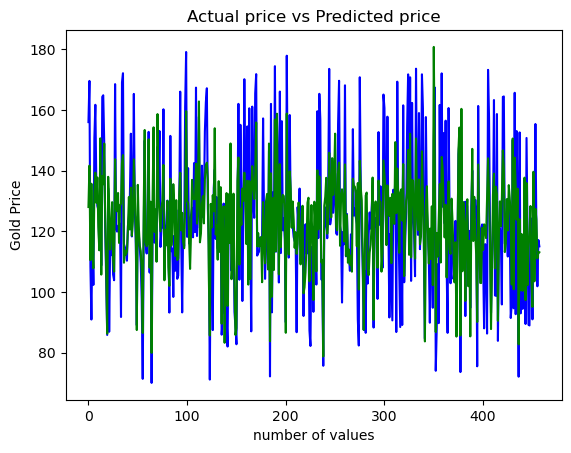

In [40]:
plt.plot(y_test,color="blue",label="Actual value")
plt.plot(y_pred,color="green",label="Predicted value")
plt.title("Actual price vs Predicted price")
plt.xlabel("number of values")
plt.ylabel("Gold Price")
plt.show()
